In [126]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import hvplot.pandas
import geopandas as gpd
import geoviews as gv
from cartopy import crs
import matplotlib.pyplot as plt
import geoviews.tile_sources as gvts
from matplotlib.cbook import boxplot_stats


In [127]:
overall_data = pd.read_csv("overall_df.csv")
overall_data

,Unnamed: 0,County,Life Expectancy Rank,Life Expectancy,Tax Rank,Tax Rate,Salary/House Rank,salary/house,state,property tax rate,rank property tax,Education Rank,percent hs diploma,sum rank,overall rank
0,0,Wallace County KS,190,81.600000,585,0.083333,3,2.152800,KS,1.43%,1789.0,109.0,95.6,2676.0,1
1,1,Eureka County NV,226,81.400000,2003,0.069333,471,0.620171,NV,0.55%,125.5,168.0,95.1,2993.5,2
2,2,Lincoln County KS,499,80.300000,622,0.082500,10,1.696424,KS,1.43%,1789.0,121.0,95.5,3041.0,3
3,3,Lane County KS,653,79.800000,531,0.085000,13,1.640908,KS,1.43%,1789.0,97.0,95.7,3083.0,4
4,4,Gove County KS,588,80.000000,455,0.087500,17,1.584128,KS,1.43%,1789.0,295.0,94.3,3144.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,2713,Malheur County OR,1525,77.771429,3187,0.000000,2423,0.284569,OR,0.93%,1382.0,2710.5,81.5,11227.5,2714
2714,2714,Newton County TX,1957,76.825000,2013,0.069167,2250,0.313347,TX,1.74%,2474.5,2642.5,82.1,11337.0,2715
2715,2715,Knox County KY,2973,73.475000,2749,0.060000,1542,0.403072,KY,0.85%,1015.0,3059.0,76.1,11338.0,2716
2716,2716,Matagorda County TX,2154,76.360000,2095,0.067500,1945,0.350115,TX,1.74%,2474.5,2728.5,81.3,11397.0,2717


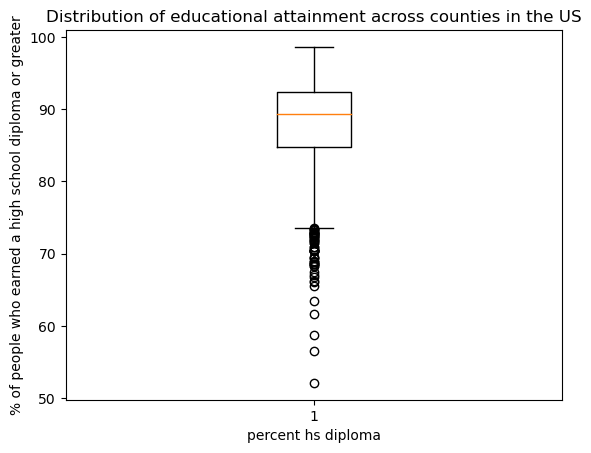

In [128]:
# Create box plot
fig, ax = plt.subplots()
ax.boxplot(overall_data['percent hs diploma'])

#format box plot
plt.title('Distribution of educational attainment across counties in the US')
plt.ylabel('% of people who earned a high school diploma or greater')
plt.xlabel('percent hs diploma')

#display boxplpt
plt.savefig('education_boxplot.png')
plt.show()


In [129]:
##Find outliers in education data
q1, q3 = np.percentile(overall_data['percent hs diploma'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = overall_data[(overall_data['percent hs diploma'] < lower_bound) | (overall_data['percent hs diploma'] > upper_bound)]

# Create a DataFrame of outliers and county names
outliers_df = pd.DataFrame({'County': outliers['County'], 'Percent HS Diploma': outliers['percent hs diploma'], 'overall rank': outliers['overall rank']})
outliers_df = outliers_df.sort_values('Percent HS Diploma')

# Display IQR, number of outliers, and information about outliers
print("IQR: ", iqr)
print("Number of Outliers: ", len(outliers))
outliers_df



IQR:  7.5
Number of Outliers:  58


,County,Percent HS Diploma,overall rank
2214,Presidio County TX,52.1,2215
1777,Holmes County OH,56.5,1778
2536,Starr County TX,58.8,2537
2455,Gaines County TX,61.6,2456
2639,Maverick County TX,63.5,2640
2241,Frio County TX,65.5,2242
2678,Wolfe County KY,66.0,2679
2493,Garza County TX,66.2,2494
1897,Atkinson County GA,66.8,1898
2385,Moore County TX,67.1,2386


Correlation coefficient: 0.21


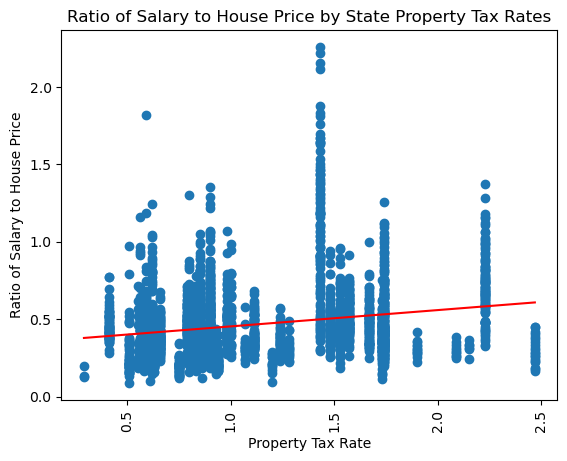

In [140]:
#sort property tax values in ascending order
overall_data = overall_data.sort_values(by='property tax rate')

# Remove any rows with missing or invalid data
overall_data = overall_data.dropna()

# Convert data types if necessary
overall_data['property tax rate'] = overall_data['property tax rate'].astype(float)
overall_data['salary/house'] = overall_data['salary/house'].astype(float)

# Create a scatter plot
plt.scatter(overall_data['property tax rate'], overall_data['salary/house'])

# Calculate the linear regression line using linregress()
try:
    slope, intercept, r_value, p_value, std_err = linregress(overall_data['property tax rate'], overall_data['salary/house'])
    line = slope * overall_data['property tax rate'] + intercept
    # Add the linear regression line to the plot
    plt.plot(overall_data['property tax rate'], line, color='red')
except ValueError as e:
    print(f"Error calculating linear regression: {e}")

#Format plot
plt.xticks(rotation = 90)
plt.xlabel("Property Tax Rate")
plt.ylabel("Ratio of Salary to House Price")
plt.title("Ratio of Salary to House Price by State Property Tax Rates")

#display plot, correlation coefficient, and save PNG
plt.savefig('tax_by_sal_house.png')
print("Correlation coefficient:", round(r_value, 2))
plt.show()

Correlation coefficient: -0.17


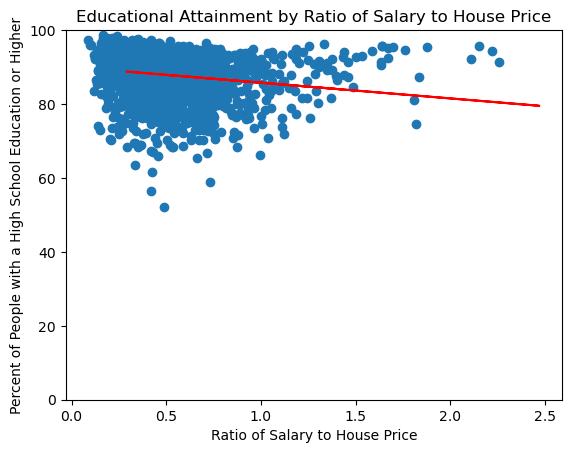

In [141]:
#Sort ratio of salary to house price values in ascending order
overall_data = overall_data.sort_values(by='salary/house')

#create scatter plot
plt.scatter(overall_data["salary/house"], overall_data["percent hs diploma"])

#find linear regression
slope, intercept, r_value, p_value, std_err = linregress(overall_data['salary/house'], overall_data['percent hs diploma'])
line = slope * overall_data['property tax rate'] + intercept

# Add linear regression line to scatter plot
plt.plot(overall_data['property tax rate'], line, color='red')
plt.xlabel("Ratio of Salary to House Price")
plt.ylabel("Percent of People with a High School Education or Higher")
plt.ylim(0,100)
plt.title("Educational Attainment by Ratio of Salary to House Price")

#display plot, correlation coefficient, and save PNG
plt.savefig("ed_by_sal_house.png")
print("Correlation coefficient:", round(r_value, 2))
plt.show()